In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Exploration

In [97]:
mytrain = 'ICE_692'

In [98]:
df = pd.read_csv(f'../data/trains/{mytrain}_delay.csv', index_col=0)

In [99]:
myroute = list(df.columns)

In [100]:
df

,München Hbf,München-Pasing,Augsburg Hbf,Ulm Hbf,Stuttgart Hbf,Mannheim Hbf,Frankfurt(Main)Hbf,Fulda,Eisenach,Erfurt Hbf,Leipzig Hbf,Lutherstadt Wittenberg Hbf,Berlin Südkreuz,Berlin Hbf (tief),Berlin Gesundbrunnen
date,,,,,,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,4.0,1.0,1.0,1.0
2019-01-03,NaN,NaN,NaN,NaN,3.0,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,0.0,2.0,4.0,3.0,4.0,6.0,3.0,2.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,1.0,1.0,0.0,2.0,7.0,5.0,4.0,1.0,0.0,5.0,1.0,2.0,0.0,0.0,0.0
2021-09-09,1.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-09-10,1.0,1.0,0.0,2.0,7.0,3.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0


<AxesSubplot:ylabel='date'>

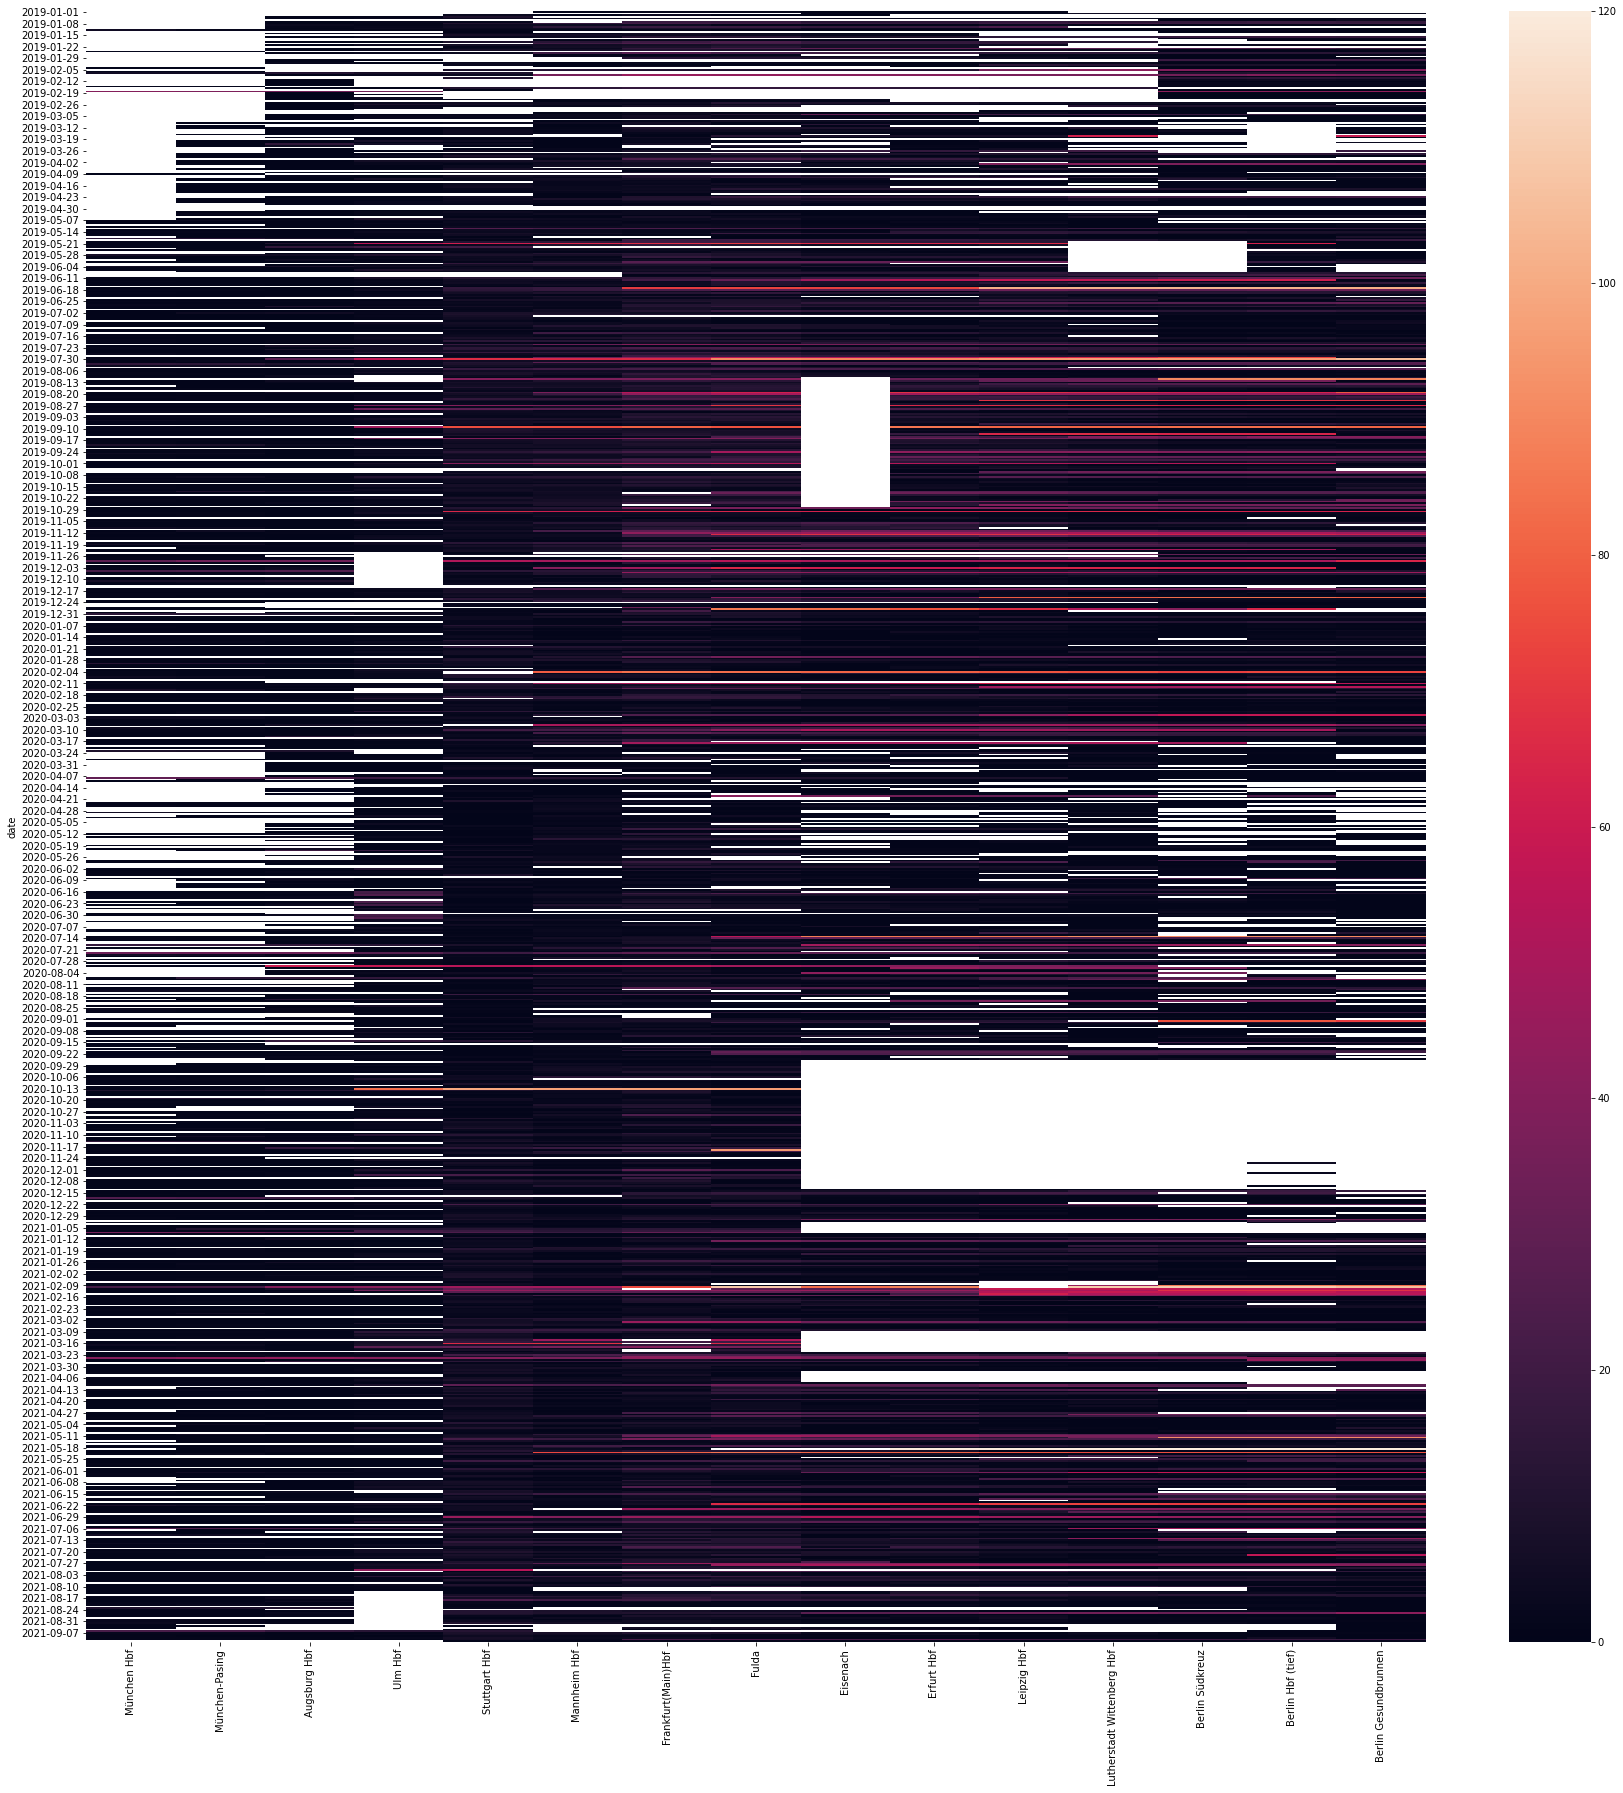

In [101]:
plt.figure(figsize=(30,30))
sns.heatmap(df, cbar=True, vmax=120)

Text(0.5, 1.0, 'ICE_692 average delay')

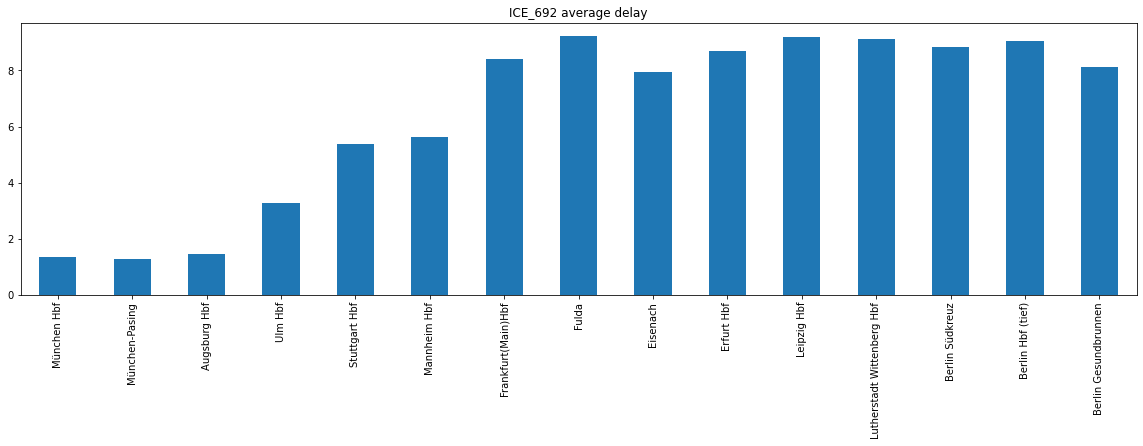

In [102]:
plt.figure(figsize=(20,5))
df.mean().plot.bar()
plt.title(f'{mytrain} average delay')

Text(0.5, 1.0, 'ICE_692 maximum delay')

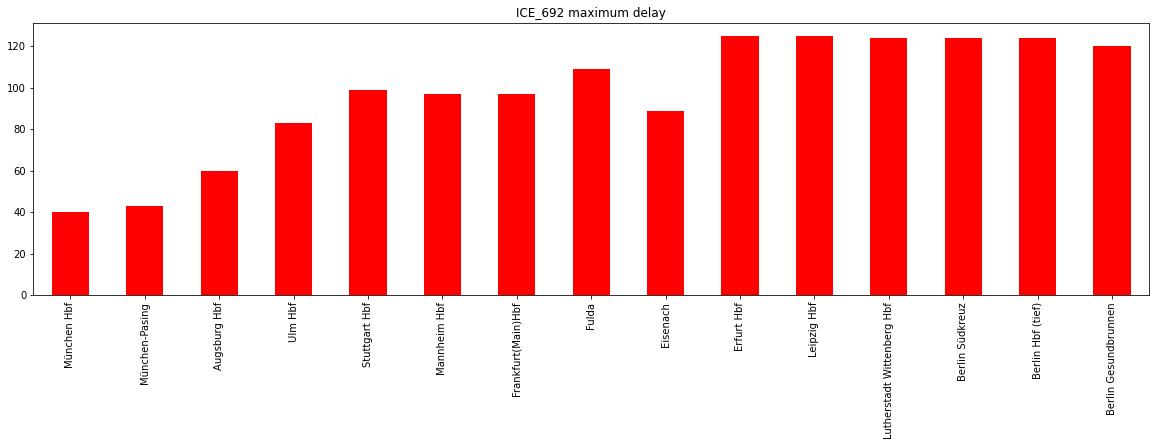

In [103]:
plt.figure(figsize=(20,5))
df.max().plot.bar(color='r')
plt.title(f'{mytrain} maximum delay')

## prototype

In [ ]:
mylist = ['Zürich HB', 'Freiburg(Breisgau) Hbf', 'Mainz Hbf', 'Köln Hbf', 'Münster(Westf)Hbf', 'Hamburg Hbf']
fig, axs = plt.subplots(len(mylist), 1, figsize=(30,30))
for i in range(len(mylist)):
    axs[i].plot(df.index, df[mylist[i]])
    axs[i].set_xlim(['2019-01-01', '2020-12-31'])
    axs[i].set_ylim([0, 60])
    axs[i].text(0.5,0.9, mylist[i],
        horizontalalignment='center',
        transform=axs[i].transAxes)

plt.setp(axs, xticks=[])
plt.subplots_adjust(wspace=0, hspace=0)

# Feature Engineering

In [104]:
df.index = pd.to_datetime(df.index)

In [105]:
df['weekday'] = df.index.dayofweek

In [106]:
df['month'] = df.index.month

In [107]:
df = df.join(pd.get_dummies(df.weekday, prefix = 'd'))

In [108]:
df = df.join(pd.get_dummies(df.month, prefix = 'm'))

In [109]:
df.columns

Index(['München Hbf', 'München-Pasing', 'Augsburg Hbf', 'Ulm Hbf',
       'Stuttgart Hbf', 'Mannheim Hbf', 'Frankfurt(Main)Hbf', 'Fulda',
       'Eisenach', 'Erfurt Hbf', 'Leipzig Hbf', 'Lutherstadt Wittenberg Hbf',
       'Berlin Südkreuz', 'Berlin Hbf (tief)', 'Berlin Gesundbrunnen',
       'weekday', 'month', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
       'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10',
       'm_11', 'm_12'],
      dtype='object')

In [110]:
df.shape

(986, 36)

adding **"bundesweite Feiertage" (holidays)** and workdays before and after

In [111]:
holidays = []
with open('../data/holidays.txt', 'r') as myfile:
    holidays = myfile.read().splitlines()
    holidays = [pd.to_datetime(h, format="%d-%m-%Y") for h in holidays]

In [112]:
df['holiday'] = 0
df['before_h'] = 0
df['after_h'] = 0

In [113]:
for h in holidays:
    if h in df.index:
        df.at[h, 'holiday'] = 1
        df.at[h, 'after_h'] = 0
        befor_h = h - pd.Timedelta(days=1)
        after_h = h + pd.Timedelta(days=1)
        if befor_h in df.index and df.loc[befor_h, 'weekday'] < 5 and df.loc[befor_h, 'holiday'] == 0:
            df.at[befor_h, 'before_h'] = 1
        if after_h in df.index and df.loc[after_h, 'weekday'] < 5:
            df.at[after_h, 'after_h'] = 1

## exploring features

<AxesSubplot:xlabel='weekday'>

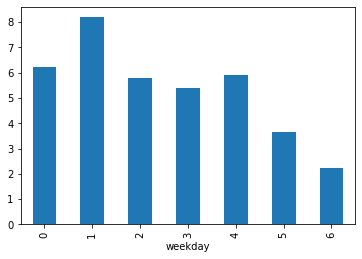

In [114]:
df.groupby("weekday")['Stuttgart Hbf'].mean().plot.bar()

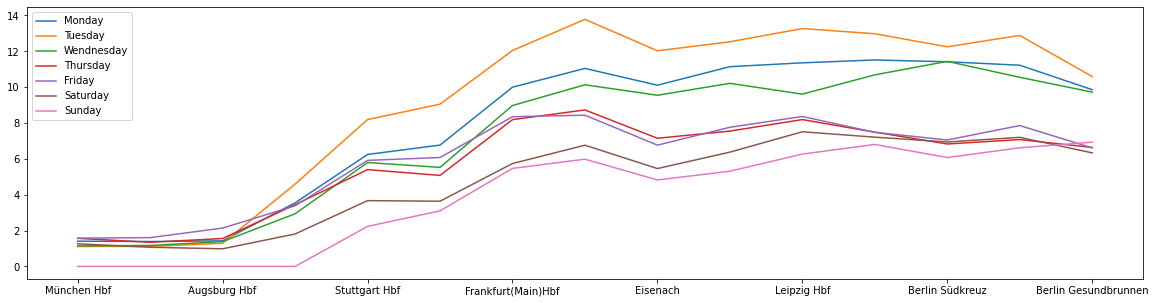

In [115]:
weekdays = ['Monday', 'Tuesday', 'Wendnesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20,5))
for i in range(7):
    df.loc[df.weekday == i][myroute].mean().plot(label=weekdays[i])
plt.legend()

## exploring the features

**PAULA:** lower grpah is better, few stations and weekdays

In [116]:
df.before_h.sum(), df.holiday.sum(), df.after_h.sum()

(15, 32, 14)

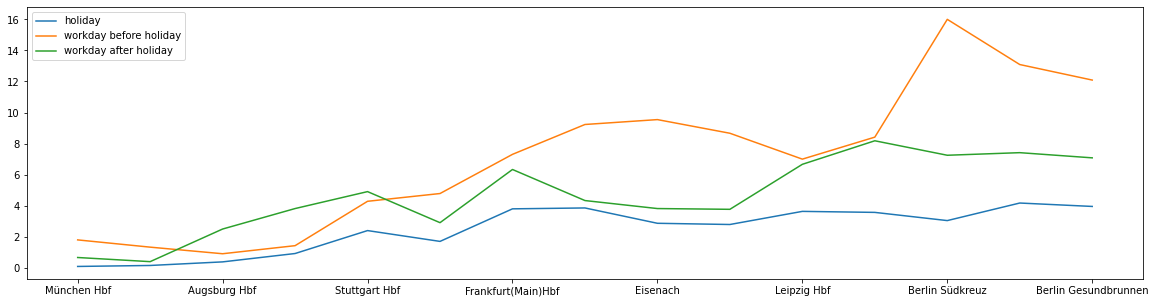

In [117]:
plt.figure(figsize=(20,5))
df.loc[df.holiday == 1][myroute].mean().plot(label='holiday')
df.loc[df.before_h == 1][myroute].mean().plot(label='workday before holiday')
df.loc[df.after_h == 1][myroute].mean().plot(label='workday after holiday')
plt.legend()

<AxesSubplot:xlabel='holiday'>

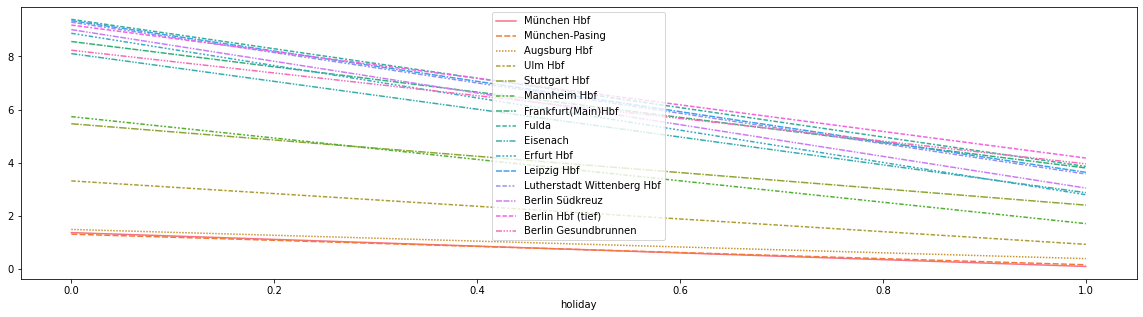

In [118]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df.groupby("holiday")[myroute].mean())

# machine learning

## machine learning modules

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## prototype: train-test-split

In [162]:
df.columns

Index(['München Hbf', 'München-Pasing', 'Augsburg Hbf', 'Ulm Hbf',
       'Stuttgart Hbf', 'Mannheim Hbf', 'Frankfurt(Main)Hbf', 'Fulda',
       'Eisenach', 'Erfurt Hbf', 'Leipzig Hbf', 'Lutherstadt Wittenberg Hbf',
       'Berlin Südkreuz', 'Berlin Hbf (tief)', 'Berlin Gesundbrunnen',
       'weekday', 'month', 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
       'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10',
       'm_11', 'm_12', 'holiday', 'before_h', 'after_h'],
      dtype='object')

In [163]:
myexample = 'Frankfurt(Main)Hbf'

In [164]:
df_sub = df[[myexample,
        'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
        'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
        'holiday', 'before_h', 'after_h']].copy()
df_sub.dropna(inplace=True)
df_sub.shape

(903, 23)

In [165]:
y = df_sub[myexample]
X = df_sub.drop([myexample], axis=1)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((722, 22), (181, 22), (722,), (181,))

## prototype: mean

In [167]:
mdu = DummyRegressor(strategy="mean")

In [168]:
mdu.fit(X_train, y_train)

DummyRegressor()

In [169]:
y_train_pred = mdu.predict(X_train)
y_test_pred = mdu.predict(X_test)

In [170]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(7.464184590357656, 6.742826096937604)

## prototype: Linear Regression

In [171]:
mlr = LinearRegression()

In [172]:
mlr.fit(X_train, y_train)

LinearRegression()

In [173]:
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

In [174]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(7.170360110803324, 6.569060773480663)

## prototype: random forest

In [175]:
rf = RandomForestRegressor(max_depth=8, bootstrap=True)

In [176]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8)

In [177]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [178]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(7.053689893213902, 6.757612239772358)

### prototype: qaurtiles

In [179]:
mydelays = list(df[myexample].dropna())
mydelays.sort()
n = len(mydelays)
q = [[mydelays[0], mydelays[n//4]],
    [mydelays[n//4], mydelays[n//2]],
    [mydelays[n//2], mydelays[3*n//4]],
    [mydelays[3*n//4], mydelays[-1]]]
print(n)
pd.DataFrame(data=q, index=['25 %' for i in range(4)], columns=['from', 'to'])

903


,from,to
25 %,0.0,2.0
25 %,2.0,5.0
25 %,5.0,10.0
25 %,10.0,97.0


# predicting with all models

In [144]:
def evaluate_regressor(mymodel, mystation):
    df_sub = df[[mystation, 'd_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6',
                'm_1', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
                'holiday', 'before_h', 'after_h']].copy()
    df_sub.dropna(inplace=True)
    X = df_sub.drop([mystation], axis=1)
    y = df_sub[mystation]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mymodel.fit(X_train, y_train)
    mae_train = round(mean_absolute_error(y_train, mymodel.predict(X_train)), 1)
    mae_test = round(mean_absolute_error(y_test, mymodel.predict(X_test)), 1)
    return mae_train, mae_test

In [147]:
mdu = DummyRegressor(strategy="mean")
mlr = LinearRegression()
mrf = RandomForestRegressor(max_depth=5, bootstrap=True)

results = pd.DataFrame(index=myroute, columns=["mean_train", "mean_test", "linreg_train", "linreg_test", "ranfor_train", "ranfor_test"])
for mystation in myroute:
    
    edu_0, edu_1 = evaluate_regressor(mdu, mystation)
    results.loc[mystation, "mean_train"] = edu_0
    results.loc[mystation, "mean_test"] = edu_1
    
    elr_0, elr_1 = evaluate_regressor(mlr, mystation)
    results.loc[mystation, "linreg_train"] = elr_0
    results.loc[mystation, "linreg_test"] = elr_1
    
    erf_0, erf_1 = evaluate_regressor(mrf, mystation)
    results.loc[mystation, "ranfor_train"] = erf_0
    results.loc[mystation, "ranfor_test"] = erf_1

results

,mean_train,mean_test,linreg_train,linreg_test,ranfor_train,ranfor_test
München Hbf,1.5,2.2,1.6,2.2,1.5,2.5
München-Pasing,1.8,1.6,1.8,1.6,1.8,1.6
Augsburg Hbf,2.1,2.2,2.1,2.2,2.1,2.2
Ulm Hbf,3.7,3.3,3.6,3.3,3.6,3.2
Stuttgart Hbf,4.5,4.6,4.3,4.4,4.2,4.4
Mannheim Hbf,5.5,4.9,5.4,5.0,5.1,5.0
Frankfurt(Main)Hbf,7.5,6.7,7.2,6.6,7.1,6.7
Fulda,8.8,9.4,8.7,9.4,8.6,9.7
Eisenach,8.9,9.3,8.4,9.1,8.2,9.5
Erfurt Hbf,10.0,9.4,9.5,8.7,9.4,8.9


In [148]:
summary = pd.DataFrame(index=['training', 'testing'], columns=["mean", "linreg", "ranfor"])
summary.loc['training', 'mean'] = round(results["mean_train"].mean(), 1)
summary.loc['training', 'linreg'] = round(results["linreg_train"].mean(), 1)
summary.loc['training', 'ranfor'] = round(results["ranfor_train"].mean(), 1)
summary.loc['testing', 'mean'] = round(results["mean_test"].mean(), 1)
summary.loc['testing', 'linreg'] = round(results["linreg_test"].mean(), 1)
summary.loc['testing', 'ranfor'] = round(results["ranfor_test"].mean(), 1)
summary

,mean,linreg,ranfor
training,7.4,7.1,7.0
testing,7.1,7.0,7.2


### learning record (example EC_8):

- using mean 10.4 min
- linreg using weekdays/months 10.0/10.2 min
- linreg using weekdays/months and holidays 9.9/10.2 min
- random forest using weekdays/months/holidays 9.9/10.3 min